In [1]:
import pandas as pd
df = pd.read_csv(r'/content/Custom_CNN_Features.csv')

In [2]:
df


,Filename,Class Label,f0,f1,f2,f3,f4,f5,f6,f7,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
0,1.png,2,50.557468,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,316.271667,0.0,239.577011,277.834534,205.776398,0.0,0.0,0.0,0.0,91.438698
1,10.jpg.png,2,125.256027,0.0,0.0,0.0,0.0,0.0,48.989120,0,...,1317.333740,0.0,1000.075012,1118.496948,1030.366699,0.0,0.0,0.0,0.0,297.483124
2,10.png,2,50.160606,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,330.470978,0.0,251.886398,288.062134,220.889481,0.0,0.0,0.0,0.0,93.795654
3,100.png,2,63.720730,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,442.839233,0.0,345.145599,389.100678,304.433990,0.0,0.0,0.0,0.0,117.381721
4,10091.jpg,2,64.484604,0.0,0.0,0.0,0.0,0.0,37.368713,0,...,835.147400,0.0,649.643616,693.101868,690.640564,0.0,0.0,0.0,0.0,159.916016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,patch_84.jpg.png,2,283.005707,0.0,0.0,0.0,0.0,0.0,73.068192,0,...,2643.636230,0.0,2036.106934,2269.582275,1973.414917,0.0,0.0,0.0,0.0,657.907715
3249,patch_85.jpg.png,2,609.193603,0.0,0.0,0.0,0.0,0.0,131.018112,0,...,5950.206055,0.0,4727.840820,5170.731934,4594.757324,0.0,0.0,0.0,0.0,1362.733398
3250,patch_86.jpg.png,2,781.789490,0.0,0.0,0.0,0.0,0.0,174.997360,0,...,7535.423828,0.0,5972.883789,6563.629883,5749.376465,0.0,0.0,0.0,0.0,1758.735840
3251,patch_87.jpg.png,2,688.966675,0.0,0.0,0.0,0.0,0.0,206.603851,0,...,7119.000977,0.0,5575.274414,6160.208984,5423.260742,0.0,0.0,0.0,0.0,1670.340088


In [7]:
df.columns

Index(['Filename', 'Class Label', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6',
       'f7',
       ...
       'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198',
       'f199'],
      dtype='object', length=202)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [4]:

# 1. Data Types of Attributes
print("Data Types and Missing Values:")
print(df.info())

# 2. Missing Values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Columns: 202 entries, Filename to f199
dtypes: float64(174), int64(27), object(1)
memory usage: 5.0+ MB
None

Missing Values:
Series([], dtype: int64)



Class Distribution:
Class Label
1    1634
0    1055
2     564
Name: count, dtype: int64


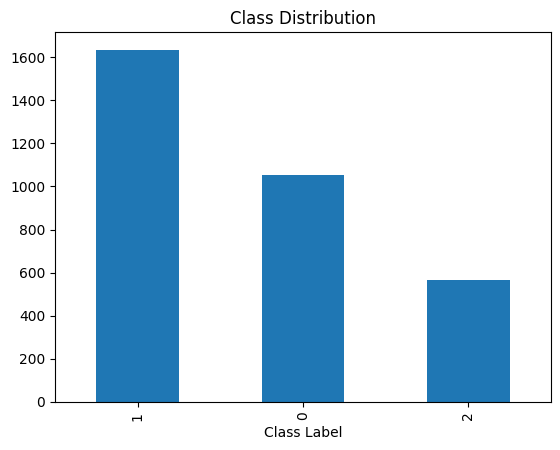

In [8]:
# 3. Class Balance
print("\nClass Distribution:")
print(df['Class Label'].value_counts())
df['Class Label'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()


In [10]:
df_numeric = df.select_dtypes(include=['number'])


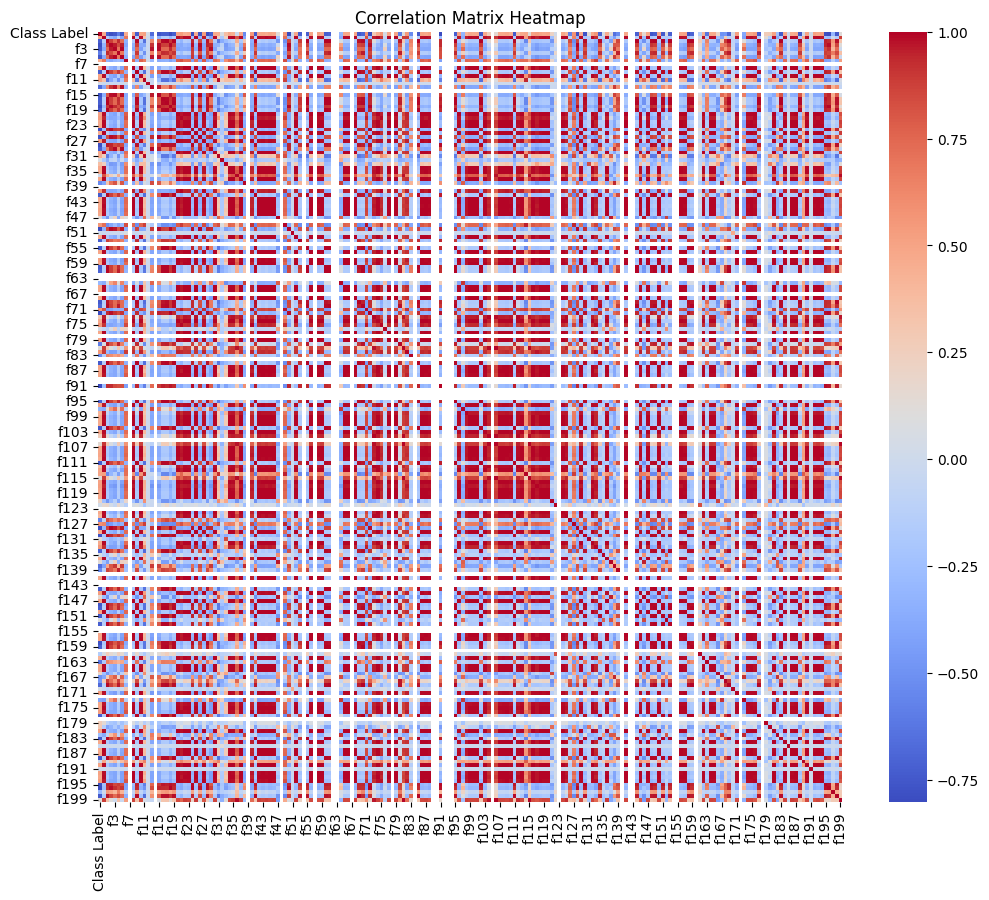

In [11]:
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [14]:
# Correlation matrix
correlation_matrix = df_numeric.corr()

In [15]:
correlation_matrix

,Class Label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
Class Label,1.000000,0.463661,-0.722913,-0.780848,-0.746388,-0.595582,-0.757032,0.463535,NaN,0.480180,...,0.493343,0.003841,0.510298,0.484197,0.524550,-0.786789,-0.801463,-0.296790,-0.742889,0.116454
f0,0.463661,1.000000,-0.135262,-0.310323,-0.380149,-0.098776,-0.390284,0.693381,NaN,0.987769,...,0.985287,-0.005591,0.979486,0.987877,0.968715,-0.241574,-0.276247,-0.017810,-0.165086,0.885136
f1,-0.722913,-0.135262,1.000000,0.881897,0.744823,0.930110,0.739068,-0.332064,NaN,-0.177941,...,-0.192420,-0.006183,-0.228759,-0.182615,-0.260274,0.953695,0.935592,0.570506,0.971878,0.331528
f2,-0.780848,-0.310323,0.881897,1.000000,0.961333,0.841121,0.957453,-0.382068,NaN,-0.337815,...,-0.356969,-0.013145,-0.368850,-0.346241,-0.381648,0.948737,0.984923,0.511914,0.862041,0.119751
f3,-0.746388,-0.380149,0.744823,0.961333,1.000000,0.703499,0.993130,-0.306890,NaN,-0.396633,...,-0.411073,-0.017359,-0.405474,-0.404172,-0.406908,0.845233,0.916102,0.413386,0.737351,-0.008737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f195,-0.786789,-0.241574,0.953695,0.948737,0.845233,0.884773,0.836855,-0.426413,NaN,-0.266024,...,-0.285402,-0.008503,-0.316099,-0.273412,-0.339969,1.000000,0.978896,0.467266,0.956461,0.210231
f196,-0.801463,-0.276247,0.935592,0.984923,0.916102,0.857046,0.915204,-0.402051,NaN,-0.304497,...,-0.324047,-0.013734,-0.345407,-0.312529,-0.364808,0.978896,1.000000,0.502776,0.930145,0.170517
f197,-0.296790,-0.017810,0.570506,0.511914,0.413386,0.672960,0.422219,-0.129623,NaN,-0.070022,...,-0.075461,-0.004233,-0.089861,-0.071946,-0.101672,0.467266,0.502776,1.000000,0.435917,0.281530
f198,-0.742889,-0.165086,0.971878,0.862041,0.737351,0.850786,0.727451,-0.344302,NaN,-0.185647,...,-0.200284,-0.009149,-0.238299,-0.190830,-0.269656,0.956461,0.930145,0.435917,1.000000,0.283511


In [17]:
# Step 2: Matrix Rank Study
# Drop non-numeric columns and the target variable
features = df_numeric.drop(columns=['Class Label'], errors='ignore')
matrix_rank = np.linalg.matrix_rank(features.values)
print(f"Matrix Rank: {matrix_rank}")

Matrix Rank: 174


In [18]:
# Data range before normalization
print("\nData Ranges (Before Normalization):")
print(features.describe())

# Normalize using MinMaxScaler
scaler = MinMaxScaler()
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Data range after normalization
print("\nData Ranges (After Normalization):")
print(normalized_features.describe())


Data Ranges (Before Normalization):
                f0           f1           f2           f3           f4  \
count  3253.000000  3253.000000  3253.000000  3253.000000  3253.000000   
mean     17.516938    57.919104   112.822180   170.829473    17.606476   
std      54.948034    93.672074    96.561850   124.512873    35.626627   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000    46.988506    85.638191     0.000000   
50%       0.000000     0.000000    93.278381   160.636246     0.000000   
75%       0.000000   117.704697   159.855179   248.145508    12.160916   
max     781.789490   459.207794   536.879639   760.753845   202.598496   

                f5           f6      f7            f8           f9  ...  \
count  3253.000000  3253.000000  3253.0   3253.000000  3253.000000  ...   
mean    141.614480    11.035532     0.0    214.312125    32.698847  ...   
std      99.128478    20.554964     0.0    738.811309    52.730102  ...


Classifier: kNN
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       288
           1       0.90      0.95      0.93       376
           2       0.97      0.93      0.95       150

    accuracy                           0.93       814
   macro avg       0.94      0.93      0.93       814
weighted avg       0.93      0.93      0.93       814


Classifier: Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       288
           1       0.92      0.91      0.92       376
           2       0.92      0.93      0.92       150

    accuracy                           0.92       814
   macro avg       0.92      0.92      0.92       814
weighted avg       0.92      0.92      0.92       814


Classifier: SVM
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       288
           1       0.88      0.96      0.92       376
           2  

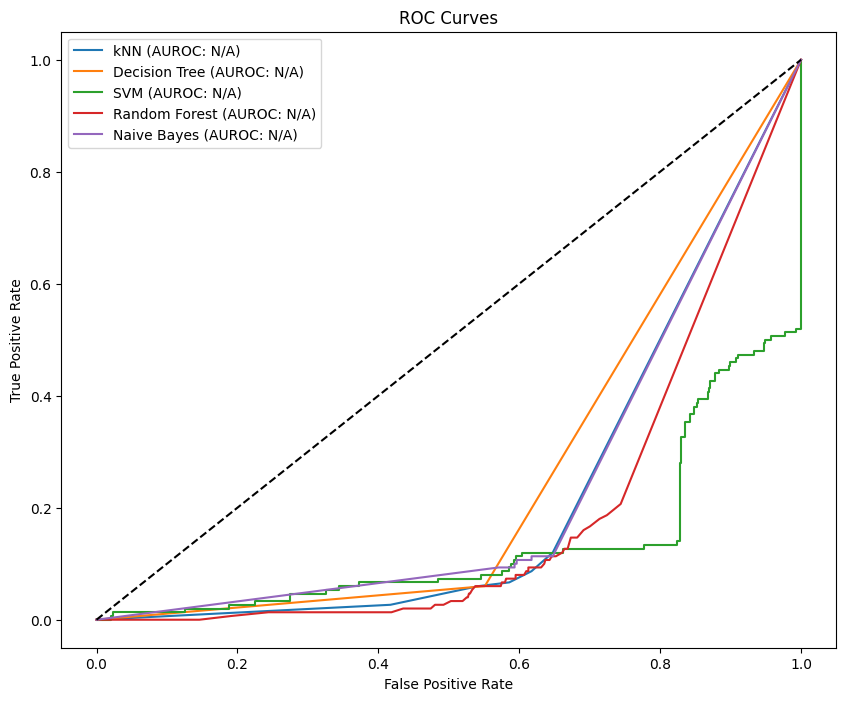

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Assuming df is your dataset and 'class_label' is the target column
X = df_numeric.drop(columns=['Class Label'])
y = df_numeric['Class Label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize classifiers
classifiers = {
    'kNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Dictionary to store evaluation results
results = {}

# ... (rest of your code) ...

# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Check if predict_proba is available and handle accordingly
    if hasattr(clf, 'predict_proba'):
        y_prob = clf.predict_proba(X_test)
        # Check if y_prob has more than one column (multi-class)
        if y_prob.shape[1] > 1:
            y_prob = y_prob[:, 1]  # Take probability of the positive class if multi-class
        else:
            y_prob = y_prob[:, 0]  # Use the probabilities of the first class (which will also be the only class in this scenario)
    elif hasattr(clf, 'decision_function'):
        y_prob = clf.decision_function(X_test)   # Use decision scores if available
    else:
        y_prob = None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    # If y_prob has a single dimension, it indicates a binary or single-class prediction
    # In this case, we skip roc_auc_score calculation as it is not applicable
    if y_prob is not None and len(y_prob.shape) > 1 and y_prob.shape[1] > 1:
        auroc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    else:
        auroc = 'N/A'

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUROC': auroc
    }

    # ... (rest of your code) ...
    # Print classification report
    print(f"\nClassifier: {name}")
    print(classification_report(y_test, y_pred))

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    if hasattr(clf, 'predict_proba') or hasattr(clf, 'decision_function'):
        if hasattr(clf, 'predict_proba'):
            y_prob = clf.predict_proba(X_test)[:, 1]
        elif hasattr(clf, 'decision_function'):
            y_prob = clf.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=y.unique()[0])

        # Check if AUROC is a number before formatting
        auroc_value = results[name]["AUROC"]
        if isinstance(auroc_value, (int, float)):  # Check if it's a number
            label = f'{name} (AUROC: {auroc_value:.2f})'
        else:
            label = f'{name} (AUROC: {auroc_value})'  # Keep it as a string if not a number

        plt.plot(fpr, tpr, label=label)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()



In [23]:
import time

# Train and evaluate classifiers
fit_analysis = {}  # To store fit analysis details
timing_results = {}  # To store timing details

for name, clf in classifiers.items():
    start_train = time.time()
    clf.fit(X_train, y_train)
    end_train = time.time()

    start_test = time.time()
    y_pred = clf.predict(X_test)
    end_test = time.time()

    # If predict_proba or decision_function is available, calculate probabilities for ROC
    if hasattr(clf, 'predict_proba'):
        y_prob = clf.predict_proba(X_test)[:, 1]
    elif hasattr(clf, 'decision_function'):
        y_prob = clf.decision_function(X_test)
    else:
        y_prob = None

    # Metrics for train and test sets
    train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_precision = precision_score(y_train, train_pred, average='weighted', zero_division=0)
    train_recall = recall_score(y_train, train_pred, average='weighted', zero_division=0)
    train_f1 = f1_score(y_train, train_pred, average='weighted', zero_division=0)

    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    test_recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Analyze fit
    fit_analysis[name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Fit Analysis': (
            'Underfit' if train_accuracy < 0.7 and test_accuracy < 0.7 else
            'Overfit' if train_accuracy > 0.9 and (train_accuracy - test_accuracy) > 0.1 else
            'Regular Fit'
        )
    }

    # Timing
    timing_results[name] = {
        'Training Time (s)': end_train - start_train,
        'Prediction Time (s)': end_test - start_test
    }

    # Print classification report
    print(f"\nClassifier: {name}")
    print(classification_report(y_test, y_pred))

# Display fit analysis
fit_analysis_df = pd.DataFrame(fit_analysis).T
print("\nFit Analysis:")
print(fit_analysis_df)

# Display timing results
timing_results_df = pd.DataFrame(timing_results).T
print("\nTiming Results:")
print(timing_results_df)



Classifier: kNN
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       288
           1       0.90      0.95      0.93       376
           2       0.97      0.93      0.95       150

    accuracy                           0.93       814
   macro avg       0.94      0.93      0.93       814
weighted avg       0.93      0.93      0.93       814


Classifier: Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       288
           1       0.91      0.94      0.92       376
           2       0.96      0.91      0.94       150

    accuracy                           0.93       814
   macro avg       0.93      0.92      0.93       814
weighted avg       0.93      0.93      0.93       814


Classifier: SVM
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       288
           1       0.88      0.96      0.92       376
           2  